# Recurrent Neural Networks for Time Series using Python 

# Video -1 (Slide 1)

In this section we are going to discuss about

1. Overview of RNN Models
2. Important Parameters in Forecasting
3. Performance Analysis of LSTM
4. Performance Analysis of Bidirectional LSTM
5. Development of LSTM and BiLSTM Models for Time Series Forecasting
6. Evaluation of LSTM and BiLSTM Models on Forecasting

# 1- Overview of RNN Models (Slide-2)


Time series prediction problems are a difficult type of predictive modeling problem. Like regression predictive modeling, time series also adds the complexity of a sequence dependence on the input variables.

A powerful type of neural network designed to handle sequence dependence is called a recurrent neural network. Recurrent neural networks have connections that have loops, adding feedback and memory to the networks over time. This memory allows this type of network to learn and generalize across sequences of inputs rather than individual patterns, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data

Recurrent neural networks (RNN) are the state of the art algorithm for sequential data and are used by Apple's Siri and Google's voice search.

RNN works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer.
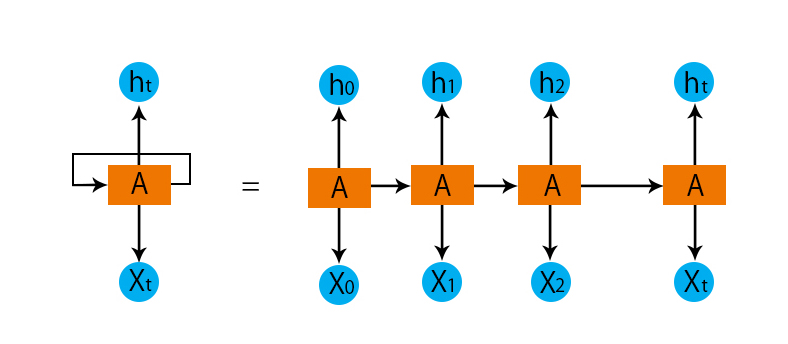 
Below is how you can convert a Feed-Forward Neural Network into a Recurrent Neural Network:

The input layer ‘x’ takes in the input to the neural network and processes it and passes it onto the middle layer. 

The middle layer ‘h’ can consist of multiple hidden layers, each with its own activation functions and weights and biases. If you have a neural network where the various parameters of different hidden layers are not affected by the previous layer, ie: the neural network does not have memory, then you can use a recurrent neural network.

The Recurrent Neural Network will standardize the different activation functions and weights and biases so that each hidden layer has the same parameters. Then, instead of creating multiple hidden layers, it will create one and loop over it as many times as required. 


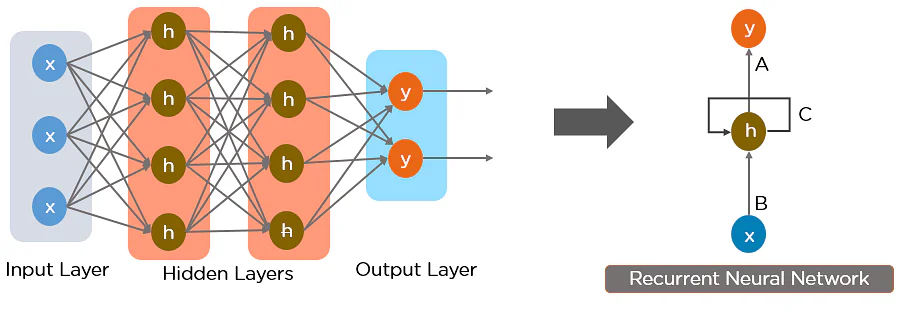

RNN were created because there were a few issues in the feed-forward neural network:

1. Cannot handle sequential data
2. Considers only the current input
3. Cannot memorize previous inputs

The solution to these issues is the RNN. 

An RNN can handle sequential data, accepting the current input data, and previously received inputs. 

RNNs can memorize previous inputs due to their internal memory.

The basic RNN Model has two major issues

1. Vanishing Gradient Problem
RNNs suffers from the problem of vanishing gradients. 

The gradients carry information used in the RNN, and when the gradient becomes too small, the parameter updates become insignificant. This makes the learning of long data sequences difficult

2. Exploding Gradient Problem

While training a neural network, if the slope tends to grow exponentially instead of decaying, this is called an Exploding Gradient. 
This problem arises when large error gradients accumulate, resulting in very large updates to the neural network model weights during the training process.

Long training time, poor performance, and bad accuracy are the major issues in gradient problems.


To Handle these issues 
First of all Long Short-Term Memory (LSTM) Networks were developed in 1997. Meanwhile, in 2005, Bidirectional LSTM model was introduced. Later in 2014, a more advance type of RNN, Gated Recurrent Unit (GRU) was introduced, which is need more high processing power and offers more robust performance. We will discuss these later.

# Video 2  (Slide 3)

# Important Parameters in Time Series Forecasting

When ever we are trying to perform forecasting of a time series data, specially using RNN models, there are a few important parameters which should be considered before diving into the predictions. These should also be considered while making any conclusion on your prediction results.
These parameters are name as

1. Biase
2. Variance
3. Underfitting
4. Overfitting
and last one is a 
5. Good Fitting
or should can say an appropriate fit to our model.

So, Lets see what exactly are these parameters and how they are linked to each other.

Look at this image

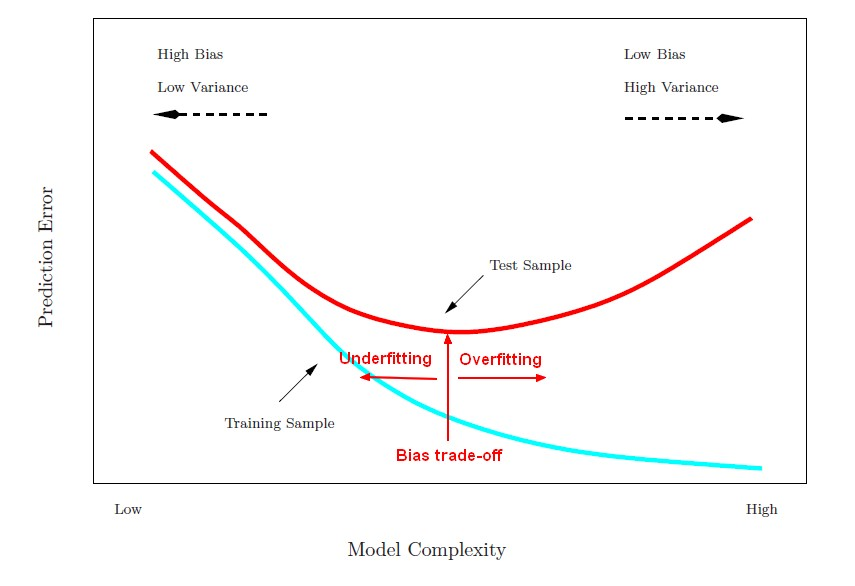

**Bias**
Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. A model with high bias pays very little attention to the training data and oversimplifies the model.

**Variance**
Variance is the variability of model prediction for a given data point or a value that tells us the spread of our data. A model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before.

**Overfitting**
Overfitting occurs when a statistical model or machine learning algorithm captures the noise of the data. Intuitively, overfitting occurs when the model or the algorithm fits the data too well. Specifically, overfitting occurs if the model or algorithm shows low bias but high variance. Overfitting is often a result of an excessively complicated model, and it can be prevented by fitting multiple models and using validation or cross-validation to compare their predictive accuracies on test data.

**Underfitting**

Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data. Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough. Specifically, underfitting occurs if the model or algorithm shows low variance but high bias. Underfitting is often a result of an excessively simple model.

Both overfitting and underfitting lead to poor predictions on new data sets.

Just to understand it more, cosider the figure here
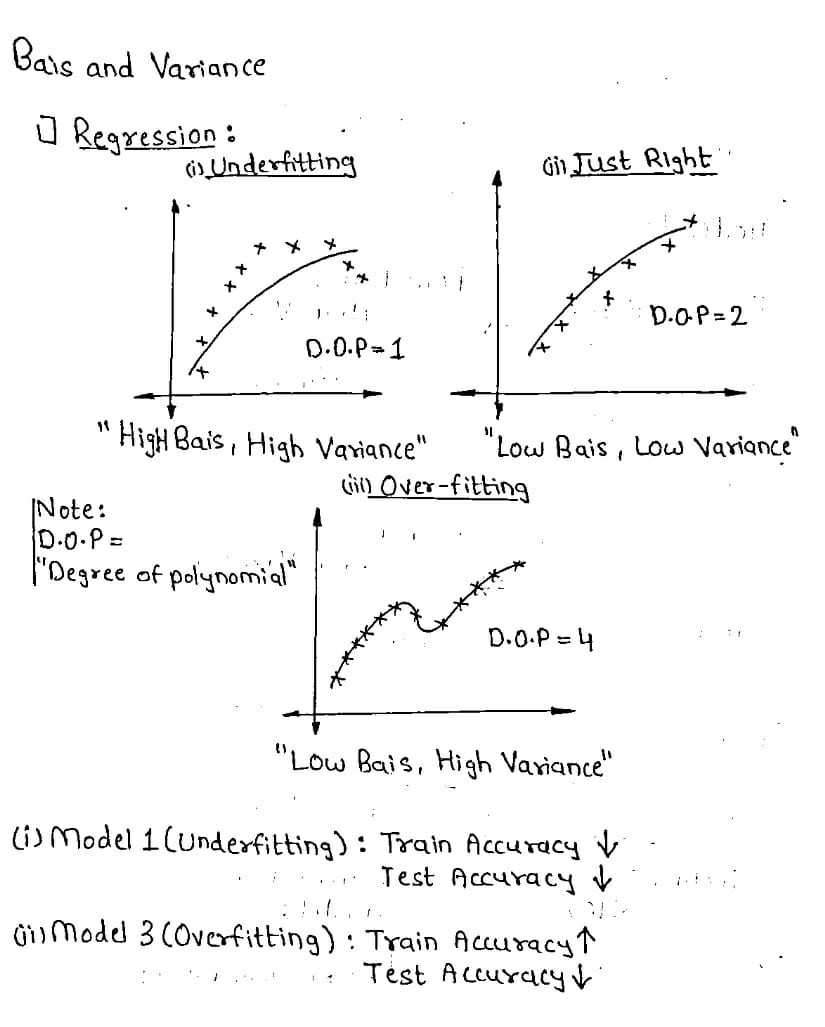


We can avoid overfitting issues by

1. Improve our model
In improving our model, we have palenty of choices such as Simplifying the model, Adding Dropout Layers,  Early Stopping of training, selecting apprporiate Feature Selection. 

The second point is to improve our data, preprocess your data, look for empty spaces, length of the data and relevent things.
2. Improve our data 

# Video 3 (Slide-4)

# Performance Analysis of LSTM

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced in (1997), and were refined and popularized by many people.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

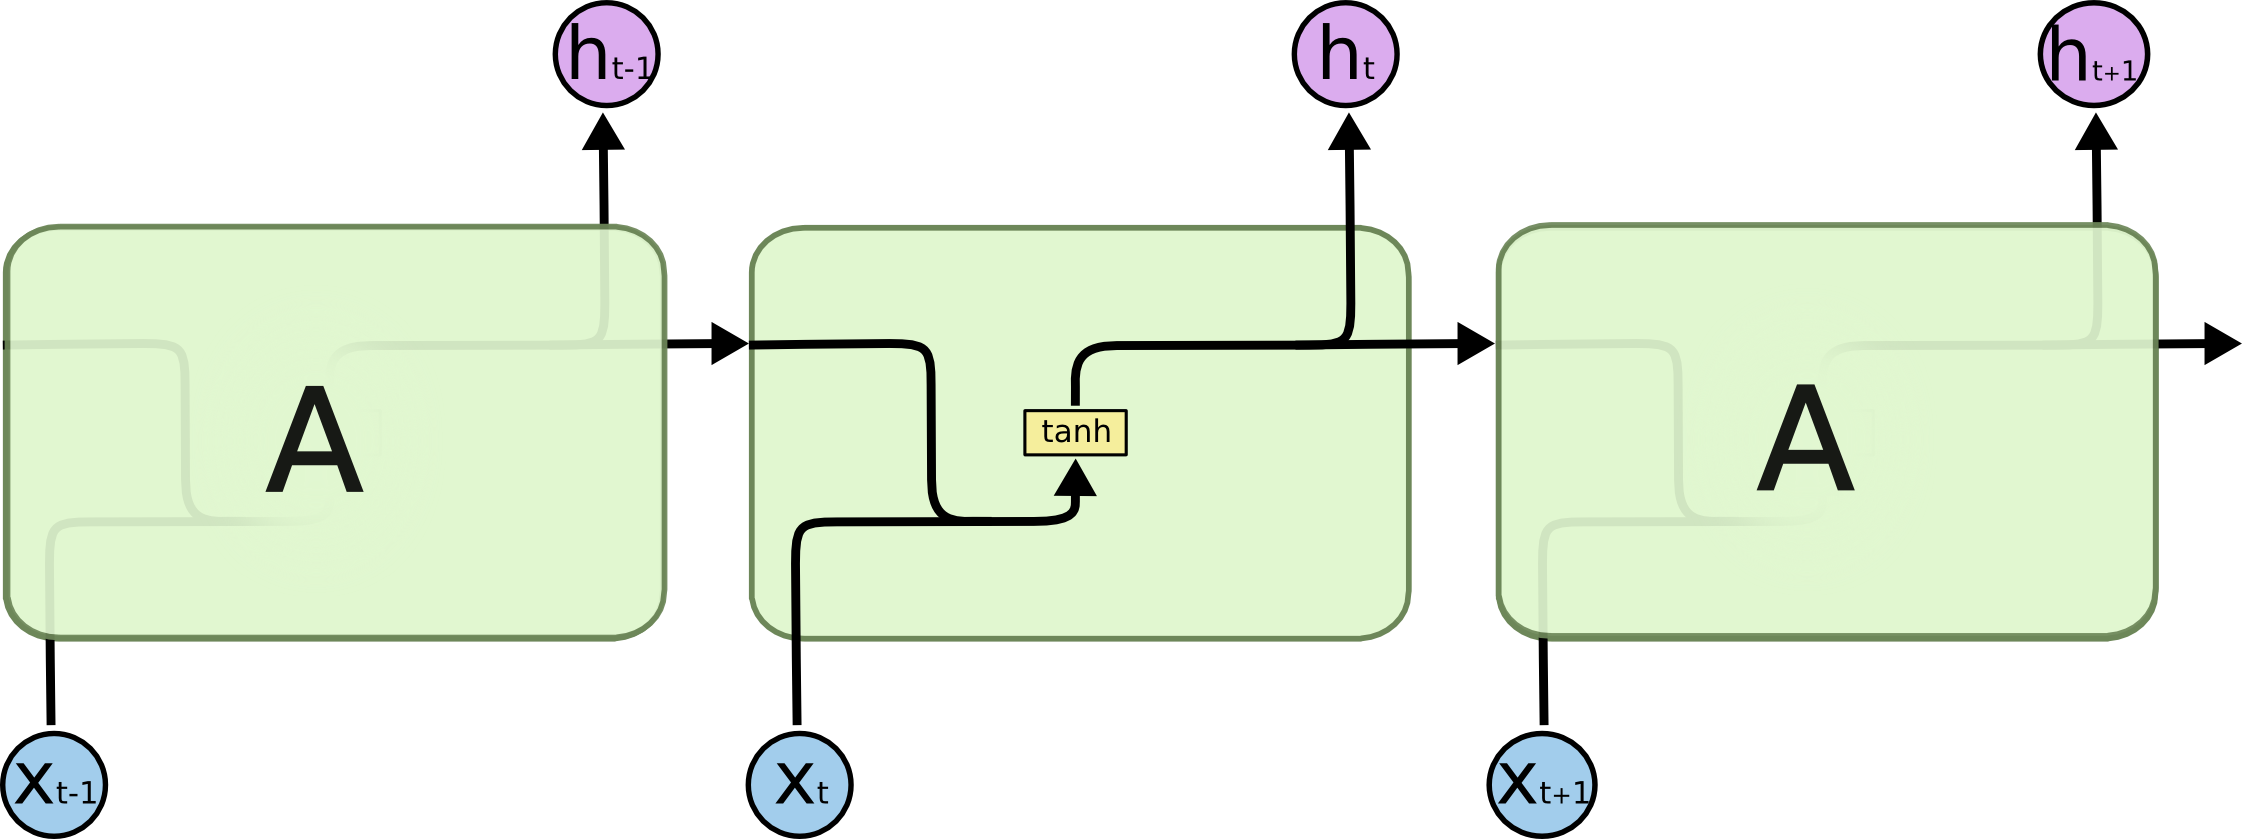



**Building LSTM Model using Python**

Schematically, a RNN layer uses a for loop to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timesteps it has seen so far.

The Keras RNN API is designed with a focus on:

**Ease of use:** the built-in keras.layers.RNN, keras.layers.LSTM, keras.layers.GRU layers enable you to quickly build recurrent models without having to make difficult configuration choices.

**Ease of customization:** You can also define your own RNN cell layer (the inner part of the for loop) with custom behavior, and use it with the generic keras.layers.RNN layer (the for loop itself). This allows you to quickly prototype different research ideas in a flexible way with minimal code.

**Basic Setup**

First of all we will import numpy, then tensorflow, 

TensorFlow is an open-source library developed by Google primarily for deep learning applications. 

It also supports traditional machine learning. 

TensorFlow was originally developed for large numerical computations without keeping deep learning in mind.

In [1]:
import numpy as np
import tensorflow as tf

Now, import keras from tensorflow

Keras is a high-level, deep learning API developed by Google for implementing neural networks.

It is written in Python and is used to make the implementation of neural networks easy.

It also supports multiple backend neural network computation.


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout, Flatten, Bidirectional, BatchNormalization,Embedding,GRU,SimpleRNN
from tensorflow.keras.layers import Conv1D,MaxPooling1D

Now lets write a basic code to build LSTM Model

In [4]:
model = Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(LSTM(128))

# Add a Dense layer with 10 units.
model.add(Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In above code: 

Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. So basically a dense layer is used for changing the dimension of the vectors by using every neuron.

Embedding layer enables us to convert each word into a fixed length vector of defined size. The resultant vector is a dense one with having real values instead of just 0's and 1's. The fixed length of word vectors helps us to represent words in a better way along with reduced dimensions

# Video 4: (Slide-5)

# Performance Analysis of Bidirectional LSTM

Bidirectional recurrent neural networks(RNN) are really just putting two independent RNNs together. This structure allows the networks to have both backward and forward information about the sequence at every time step.

Using bidirectional will run your inputs in two ways, one from past to future and one from future to past and what differs this approach from unidirectional is that in the LSTM that runs backward you preserve information from the future and using the two hidden states combined you are able in any point in time to preserve information from both past and future.

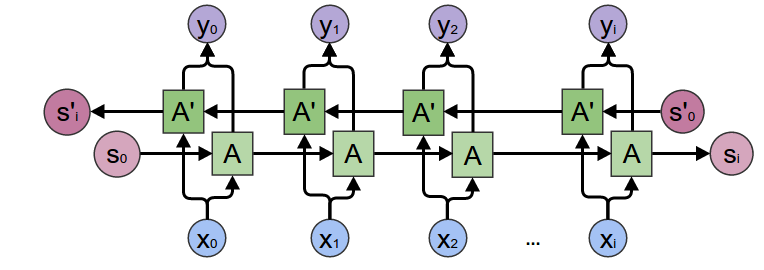

When they are suited for is a very complicated question but BiLSTMs show very good results as they can understand the context better.

**Advantages and Disadvantages of BiLSTM**

**Advantages**

It solves the problem of fixed sequence to sequence prediction. 


**Disadvantage**

Since BiLSTM has double LSTM cells so it is costly.

Not Good fit for Speech Recognition


Lets make Bidirectional LSTM

In [5]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [6]:
model = keras.Sequential()

model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(5, 10)))
model.add(layers.Bidirectional(LSTM(32)))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 5, 128)           38400     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 80,266
Trainable params: 80,266
Non-trainable params: 0
_________________________________________________________________


# Video 5: (Slide-6)

# Performance Analysis of Gated Recurrent Unit (GRU)


The Gated Recurrent Unit (GRU) is a type of Recurrent Neural Network (RNN) that, in certain cases, has advantages over long short term memory (LSTM). 

GRU uses less memory and is faster than LSTM, however, LSTM is more accurate when using datasets with longer sequences.

Unlike LSTM, it consists of only three gates and does not maintain an Internal Cell State. The information which is stored in the Internal Cell State in an LSTM recurrent unit is incorporated into the hidden state of the Gated Recurrent Unit. This collective information is passed onto the next Gated Recurrent Unit.

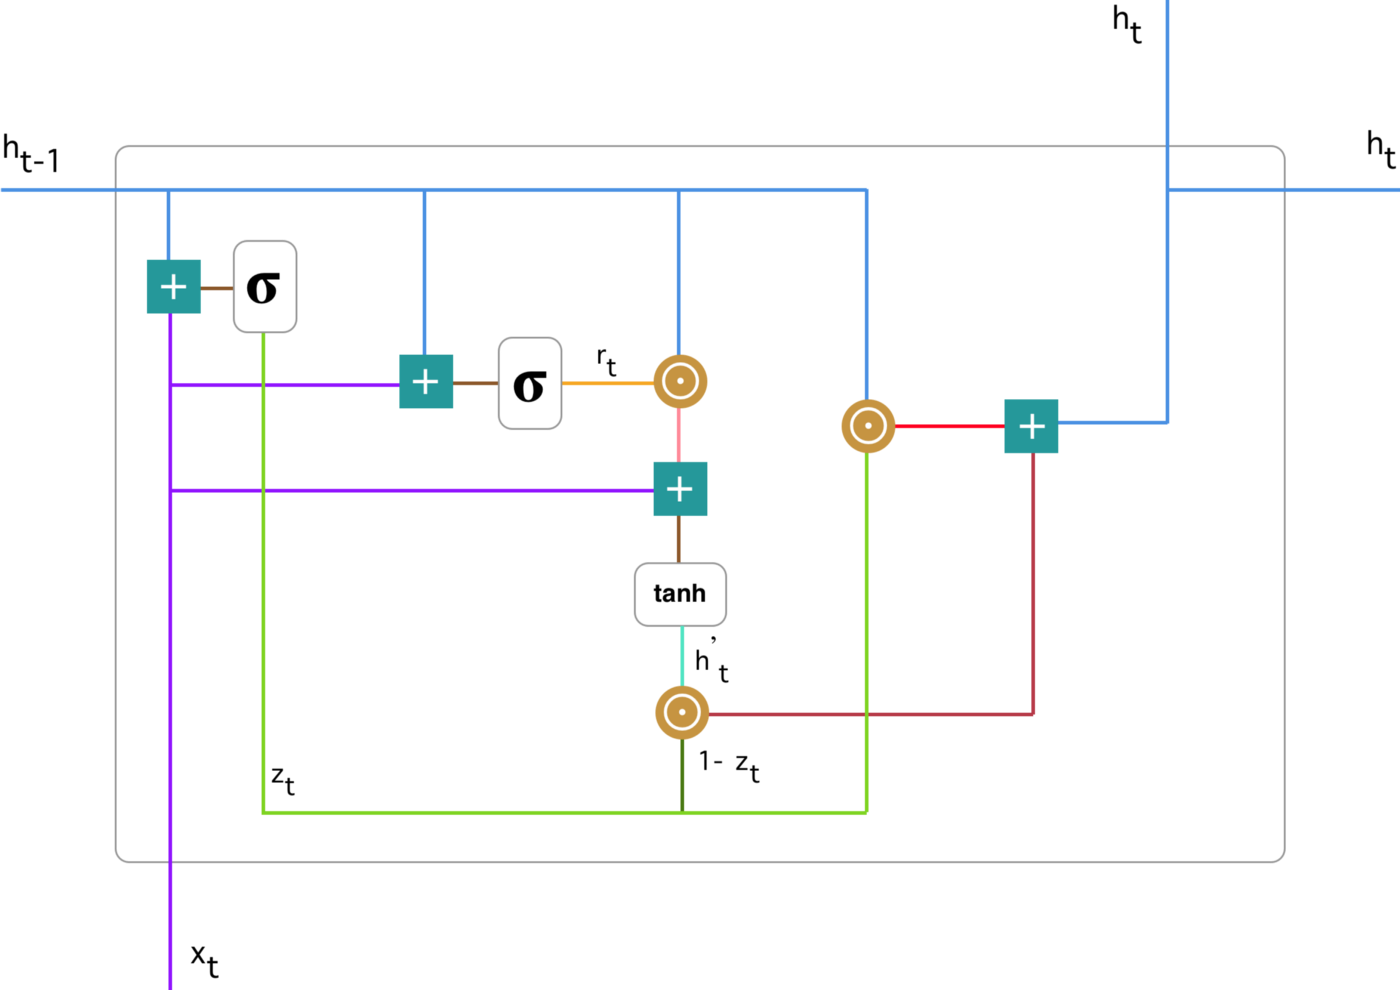


It has the following attributes

**Update Gate(z):** It determines how much of the past knowledge needs to be passed along into the future. It is analogous to the Output Gate in an LSTM recurrent unit.


**Reset Gate(r):** It determines how much of the past knowledge to forget. It is analogous to the combination of the Input Gate and the Forget Gate in an LSTM recurrent unit.


**Current Memory Gate:** It is often overlooked during a typical discussion on Gated Recurrent Unit Network. It is incorporated into the Reset Gate just like the Input Modulation Gate is a sub-part of the Input Gate and is used to introduce some non-linearity into the input and to also make the input Zero-mean. Another reason to make it a sub-part of the Reset gate is to reduce the effect that previous information has on the current information that is being passed into the future.

In [7]:
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(SimpleRNN(128))

model.add(Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 gru (GRU)                   (None, None, 256)         247296    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               49280     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 361,866
Trainable params: 361,866
Non-trainable params: 0
_________________________________________________________________


# Video 6: (Slide-7)

# Underfitting and Overfitting in LSTM Model

**Underfit**
a model may be underfit if performance on the training set is better than the validation set and performance has leveled off.
lets take a random array for training and validation and apply LSTM model to observe fitting curves

In [8]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
from matplotlib import pyplot
from numpy import array

In [9]:
# return training data
def get_train():
	seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((len(X), 1, 1))
	return X, y
 
# return validation data
def get_val():
	seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
	seq = array(seq)
	X, y = seq[:, 0], seq[:, 1]
	X = X.reshape((len(X), 1, 1))
	return X, y

In [10]:
# define model
model = Sequential()
model.add(LSTM(10, input_shape=(1,1)))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10)                480       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [11]:
# compile model
model.compile(loss='mse', optimizer='adam')

In [12]:
# fit model
X,y = get_train()
valX, valY = get_val()

In [13]:
history = model.fit(X, y, epochs=300, validation_data=(valX, valY), shuffle=False)

Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - ETA: 0s - loss: 0.1137WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000023AFD8EF378> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full 

1/1 [==============================] - 0s 19ms/step - loss: 0.0129 - val_loss: 0.1771
Epoch 147/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0128 - val_loss: 0.1757
Epoch 148/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0127 - val_loss: 0.1744
Epoch 149/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0127 - val_loss: 0.1730
Epoch 150/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0126 - val_loss: 0.1717
Epoch 151/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0125 - val_loss: 0.1704
Epoch 152/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0125 - val_loss: 0.1692
Epoch 153/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0124 - val_loss: 0.1680
Epoch 154/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0123 - val_loss: 0.1667
Epoch 155/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0123 - val_loss: 0.1656
Epoch 156/300


1/1 [==============================] - 0s 18ms/step - loss: 0.0098 - val_loss: 0.1172
Epoch 229/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0098 - val_loss: 0.1168
Epoch 230/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0098 - val_loss: 0.1164
Epoch 231/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0097 - val_loss: 0.1160
Epoch 232/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0097 - val_loss: 0.1156
Epoch 233/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0097 - val_loss: 0.1152
Epoch 234/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0097 - val_loss: 0.1148
Epoch 235/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0096 - val_loss: 0.1144
Epoch 236/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0096 - val_loss: 0.1140
Epoch 237/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0096 - val_loss: 0.1136
Epoch 238/300


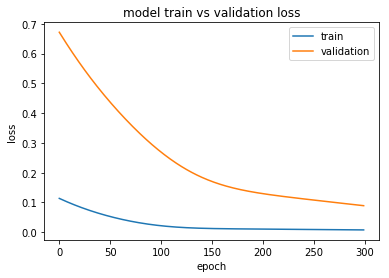

In [14]:
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In this case, performance may be improved by increasing the capacity of the model, such as the number of memory cells in a hidden layer or number of hidden layers.

**Good fit**

This can be diagnosed from a plot where the train and validation loss decrease and stabilize around the same point.

In [15]:
history = model.fit(X, y, epochs=800, validation_data=(valX, valY), shuffle=False)


Epoch 1/800
1/1 [==============================] - 0s 47ms/step - loss: 0.0078 - val_loss: 0.0888
Epoch 2/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0078 - val_loss: 0.0885
Epoch 3/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0078 - val_loss: 0.0881
Epoch 4/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0077 - val_loss: 0.0877
Epoch 5/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0077 - val_loss: 0.0873
Epoch 6/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0077 - val_loss: 0.0870
Epoch 7/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0077 - val_loss: 0.0866
Epoch 8/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0076 - val_loss: 0.0862
Epoch 9/800
1/1 [==============================] - 0s 21ms/step - loss: 0.0076 - val_loss: 0.0858
Epoch 10/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0076 - val_loss: 0.0855
Epoch 11/800
1/1 [=

Epoch 84/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0057 - val_loss: 0.0591
Epoch 85/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0056 - val_loss: 0.0588
Epoch 86/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0056 - val_loss: 0.0585
Epoch 87/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0056 - val_loss: 0.0581
Epoch 88/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0056 - val_loss: 0.0578
Epoch 89/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0055 - val_loss: 0.0575
Epoch 90/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0055 - val_loss: 0.0571
Epoch 91/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0055 - val_loss: 0.0568
Epoch 92/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0055 - val_loss: 0.0565
Epoch 93/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0054 - val_loss: 0.0562
Epoch 94/8

1/1 [==============================] - 0s 21ms/step - loss: 0.0037 - val_loss: 0.0343
Epoch 167/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0037 - val_loss: 0.0341
Epoch 168/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0037 - val_loss: 0.0338
Epoch 169/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0037 - val_loss: 0.0335
Epoch 170/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0037 - val_loss: 0.0333
Epoch 171/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0036 - val_loss: 0.0330
Epoch 172/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0036 - val_loss: 0.0328
Epoch 173/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0036 - val_loss: 0.0325
Epoch 174/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0036 - val_loss: 0.0322
Epoch 175/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0036 - val_loss: 0.0320
Epoch 176/800


1/1 [==============================] - 0s 19ms/step - loss: 0.0022 - val_loss: 0.0160
Epoch 249/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0022 - val_loss: 0.0158
Epoch 250/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0021 - val_loss: 0.0156
Epoch 251/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0021 - val_loss: 0.0154
Epoch 252/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0021 - val_loss: 0.0153
Epoch 253/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0021 - val_loss: 0.0151
Epoch 254/800
1/1 [==============================] - 0s 21ms/step - loss: 0.0021 - val_loss: 0.0149
Epoch 255/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0021 - val_loss: 0.0147
Epoch 256/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0021 - val_loss: 0.0146
Epoch 257/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0020 - val_loss: 0.0144
Epoch 258/800


1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 0.0050
Epoch 331/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - val_loss: 0.0049
Epoch 332/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 333/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 334/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0010 - val_loss: 0.0047
Epoch 335/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0010 - val_loss: 0.0046
Epoch 336/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0010 - val_loss: 0.0045
Epoch 337/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0010 - val_loss: 0.0044
Epoch 338/800
1/1 [==============================] - 0s 20ms/step - loss: 0.0010 - val_loss: 0.0043
Epoch 339/800
1/1 [==============================] - 0s 18ms/step - loss: 9.9519e-04 - val_loss: 0.0043
Epoch 340/

Epoch 409/800
1/1 [==============================] - 0s 18ms/step - loss: 4.7013e-04 - val_loss: 6.8193e-04
Epoch 410/800
1/1 [==============================] - 0s 19ms/step - loss: 4.6473e-04 - val_loss: 6.5695e-04
Epoch 411/800
1/1 [==============================] - 0s 17ms/step - loss: 4.5937e-04 - val_loss: 6.3257e-04
Epoch 412/800
1/1 [==============================] - 0s 18ms/step - loss: 4.5407e-04 - val_loss: 6.0879e-04
Epoch 413/800
1/1 [==============================] - 0s 18ms/step - loss: 4.4882e-04 - val_loss: 5.8561e-04
Epoch 414/800
1/1 [==============================] - 0s 18ms/step - loss: 4.4362e-04 - val_loss: 5.6302e-04
Epoch 415/800
1/1 [==============================] - 0s 18ms/step - loss: 4.3847e-04 - val_loss: 5.4101e-04
Epoch 416/800
1/1 [==============================] - 0s 18ms/step - loss: 4.3337e-04 - val_loss: 5.1957e-04
Epoch 417/800
1/1 [==============================] - 0s 18ms/step - loss: 4.2832e-04 - val_loss: 4.9871e-04
Epoch 418/800
1/1 [=========

Epoch 485/800
1/1 [==============================] - 0s 19ms/step - loss: 1.8630e-04 - val_loss: 1.3110e-04
Epoch 486/800
1/1 [==============================] - 0s 18ms/step - loss: 1.8398e-04 - val_loss: 1.3711e-04
Epoch 487/800
1/1 [==============================] - 0s 20ms/step - loss: 1.8169e-04 - val_loss: 1.4335e-04
Epoch 488/800
1/1 [==============================] - 0s 18ms/step - loss: 1.7943e-04 - val_loss: 1.4981e-04
Epoch 489/800
1/1 [==============================] - 0s 20ms/step - loss: 1.7719e-04 - val_loss: 1.5649e-04
Epoch 490/800
1/1 [==============================] - 0s 19ms/step - loss: 1.7499e-04 - val_loss: 1.6337e-04
Epoch 491/800
1/1 [==============================] - 0s 18ms/step - loss: 1.7281e-04 - val_loss: 1.7047e-04
Epoch 492/800
1/1 [==============================] - 0s 20ms/step - loss: 1.7066e-04 - val_loss: 1.7777e-04
Epoch 493/800
1/1 [==============================] - 0s 20ms/step - loss: 1.6854e-04 - val_loss: 1.8526e-04
Epoch 494/800
1/1 [=========

Epoch 561/800
1/1 [==============================] - 0s 19ms/step - loss: 7.4961e-05 - val_loss: 9.7915e-04
Epoch 562/800
1/1 [==============================] - 0s 19ms/step - loss: 7.4156e-05 - val_loss: 9.9276e-04
Epoch 563/800
1/1 [==============================] - 0s 18ms/step - loss: 7.3364e-05 - val_loss: 0.0010
Epoch 564/800
1/1 [==============================] - 0s 18ms/step - loss: 7.2583e-05 - val_loss: 0.0010
Epoch 565/800
1/1 [==============================] - 0s 19ms/step - loss: 7.1814e-05 - val_loss: 0.0010
Epoch 566/800
1/1 [==============================] - 0s 19ms/step - loss: 7.1057e-05 - val_loss: 0.0010
Epoch 567/800
1/1 [==============================] - 0s 18ms/step - loss: 7.0311e-05 - val_loss: 0.0011
Epoch 568/800
1/1 [==============================] - 0s 19ms/step - loss: 6.9577e-05 - val_loss: 0.0011
Epoch 569/800
1/1 [==============================] - 0s 19ms/step - loss: 6.8854e-05 - val_loss: 0.0011
Epoch 570/800
1/1 [==============================] - 0s 

Epoch 718/800
1/1 [==============================] - 0s 19ms/step - loss: 2.9171e-05 - val_loss: 0.0026
Epoch 719/800
1/1 [==============================] - 0s 18ms/step - loss: 2.9118e-05 - val_loss: 0.0026
Epoch 720/800
1/1 [==============================] - 0s 20ms/step - loss: 2.9066e-05 - val_loss: 0.0026
Epoch 721/800
1/1 [==============================] - 0s 19ms/step - loss: 2.9014e-05 - val_loss: 0.0026
Epoch 722/800
1/1 [==============================] - 0s 20ms/step - loss: 2.8964e-05 - val_loss: 0.0026
Epoch 723/800
1/1 [==============================] - 0s 19ms/step - loss: 2.8914e-05 - val_loss: 0.0026
Epoch 724/800
1/1 [==============================] - 0s 20ms/step - loss: 2.8866e-05 - val_loss: 0.0026
Epoch 725/800
1/1 [==============================] - 0s 19ms/step - loss: 2.8818e-05 - val_loss: 0.0026
Epoch 726/800
1/1 [==============================] - 0s 19ms/step - loss: 2.8771e-05 - val_loss: 0.0027
Epoch 727/800
1/1 [==============================] - 0s 19ms/ste

Epoch 797/800
1/1 [==============================] - 0s 18ms/step - loss: 2.6920e-05 - val_loss: 0.0029
Epoch 798/800
1/1 [==============================] - 0s 19ms/step - loss: 2.6907e-05 - val_loss: 0.0029
Epoch 799/800
1/1 [==============================] - 0s 19ms/step - loss: 2.6894e-05 - val_loss: 0.0029
Epoch 800/800
1/1 [==============================] - 0s 19ms/step - loss: 2.6881e-05 - val_loss: 0.0029


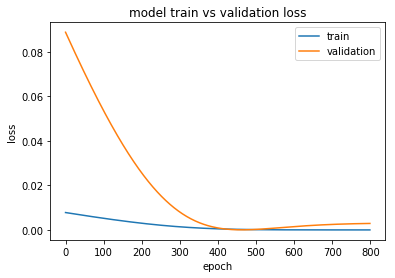

In [16]:
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

**Overfit**
This can be diagnosed from a plot where the train loss slopes down and the validation loss slopes down, hits an inflection point, and starts to slope up again

In [17]:
history = model.fit(X, y, epochs=2500, validation_data=(valX, valY), shuffle=False)

Epoch 1/2500
1/1 [==============================] - 0s 47ms/step - loss: 2.6868e-05 - val_loss: 0.0029
Epoch 2/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.6856e-05 - val_loss: 0.0029
Epoch 3/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.6844e-05 - val_loss: 0.0029
Epoch 4/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.6832e-05 - val_loss: 0.0029
Epoch 5/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.6820e-05 - val_loss: 0.0029
Epoch 6/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.6809e-05 - val_loss: 0.0030
Epoch 7/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.6797e-05 - val_loss: 0.0030
Epoch 8/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.6786e-05 - val_loss: 0.0030
Epoch 9/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.6775e-05 - val_loss: 0.0030
Epoch 10/2500
1/1 [==============================] - 0s 20ms/step - loss:

Epoch 80/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.6257e-05 - val_loss: 0.0031
Epoch 81/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.6252e-05 - val_loss: 0.0031
Epoch 82/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.6247e-05 - val_loss: 0.0031
Epoch 83/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.6241e-05 - val_loss: 0.0031
Epoch 84/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.6237e-05 - val_loss: 0.0031
Epoch 85/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.6232e-05 - val_loss: 0.0031
Epoch 86/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.6227e-05 - val_loss: 0.0031
Epoch 87/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.6222e-05 - val_loss: 0.0031
Epoch 88/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.6217e-05 - val_loss: 0.0031
Epoch 89/2500
1/1 [==============================] - 0s 19ms/ste

1/1 [==============================] - 0s 18ms/step - loss: 2.5609e-05 - val_loss: 0.0030
Epoch 237/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.5605e-05 - val_loss: 0.0030
Epoch 238/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.5601e-05 - val_loss: 0.0030
Epoch 239/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.5597e-05 - val_loss: 0.0030
Epoch 240/2500
1/1 [==============================] - 0s 22ms/step - loss: 2.5593e-05 - val_loss: 0.0030
Epoch 241/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.5589e-05 - val_loss: 0.0030
Epoch 242/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.5585e-05 - val_loss: 0.0030
Epoch 243/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.5581e-05 - val_loss: 0.0030
Epoch 244/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.5577e-05 - val_loss: 0.0030
Epoch 245/2500
1/1 [==============================] - 0s 18ms/step - l

1/1 [==============================] - 0s 18ms/step - loss: 2.4969e-05 - val_loss: 0.0029
Epoch 393/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.4964e-05 - val_loss: 0.0029
Epoch 394/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.4960e-05 - val_loss: 0.0029
Epoch 395/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.4956e-05 - val_loss: 0.0029
Epoch 396/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.4951e-05 - val_loss: 0.0029
Epoch 397/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.4947e-05 - val_loss: 0.0029
Epoch 398/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.4943e-05 - val_loss: 0.0029
Epoch 399/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.4939e-05 - val_loss: 0.0029
Epoch 400/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.4934e-05 - val_loss: 0.0029
Epoch 401/2500
1/1 [==============================] - 0s 18ms/step - l

1/1 [==============================] - 0s 17ms/step - loss: 2.4278e-05 - val_loss: 0.0028
Epoch 549/2500
1/1 [==============================] - 0s 17ms/step - loss: 2.4273e-05 - val_loss: 0.0028
Epoch 550/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.4268e-05 - val_loss: 0.0028
Epoch 551/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.4264e-05 - val_loss: 0.0028
Epoch 552/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.4259e-05 - val_loss: 0.0028
Epoch 553/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.4255e-05 - val_loss: 0.0028
Epoch 554/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.4250e-05 - val_loss: 0.0028
Epoch 555/2500
1/1 [==============================] - 0s 17ms/step - loss: 2.4245e-05 - val_loss: 0.0028
Epoch 556/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.4241e-05 - val_loss: 0.0028
Epoch 557/2500
1/1 [==============================] - 0s 20ms/step - l

1/1 [==============================] - 0s 19ms/step - loss: 2.3536e-05 - val_loss: 0.0027
Epoch 705/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3531e-05 - val_loss: 0.0027
Epoch 706/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3526e-05 - val_loss: 0.0027
Epoch 707/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.3521e-05 - val_loss: 0.0027
Epoch 708/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.3516e-05 - val_loss: 0.0027
Epoch 709/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3511e-05 - val_loss: 0.0027
Epoch 710/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3506e-05 - val_loss: 0.0027
Epoch 711/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.3501e-05 - val_loss: 0.0027
Epoch 712/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.3497e-05 - val_loss: 0.0027
Epoch 713/2500
1/1 [==============================] - 0s 18ms/step - l

1/1 [==============================] - 0s 24ms/step - loss: 2.2744e-05 - val_loss: 0.0026
Epoch 861/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.2739e-05 - val_loss: 0.0026
Epoch 862/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.2734e-05 - val_loss: 0.0026
Epoch 863/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.2729e-05 - val_loss: 0.0026
Epoch 864/2500
1/1 [==============================] - 0s 20ms/step - loss: 2.2724e-05 - val_loss: 0.0026
Epoch 865/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.2718e-05 - val_loss: 0.0026
Epoch 866/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.2713e-05 - val_loss: 0.0026
Epoch 867/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.2708e-05 - val_loss: 0.0026
Epoch 868/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.2703e-05 - val_loss: 0.0026
Epoch 869/2500
1/1 [==============================] - 0s 19ms/step - l

1/1 [==============================] - 0s 20ms/step - loss: 2.1905e-05 - val_loss: 0.0024
Epoch 1017/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.1899e-05 - val_loss: 0.0024
Epoch 1018/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.1893e-05 - val_loss: 0.0024
Epoch 1019/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.1888e-05 - val_loss: 0.0024
Epoch 1020/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.1882e-05 - val_loss: 0.0024
Epoch 1021/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.1877e-05 - val_loss: 0.0024
Epoch 1022/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.1871e-05 - val_loss: 0.0024
Epoch 1023/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.1866e-05 - val_loss: 0.0024
Epoch 1024/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.1860e-05 - val_loss: 0.0024
Epoch 1025/2500
1/1 [==============================] - 0s 18ms

1/1 [==============================] - 0s 19ms/step - loss: 2.1030e-05 - val_loss: 0.0023
Epoch 1171/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.1024e-05 - val_loss: 0.0023
Epoch 1172/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.1018e-05 - val_loss: 0.0023
Epoch 1173/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.1012e-05 - val_loss: 0.0023
Epoch 1174/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.1006e-05 - val_loss: 0.0023
Epoch 1175/2500
1/1 [==============================] - 0s 17ms/step - loss: 2.1000e-05 - val_loss: 0.0023
Epoch 1176/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0995e-05 - val_loss: 0.0023
Epoch 1177/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.0989e-05 - val_loss: 0.0023
Epoch 1178/2500
1/1 [==============================] - 0s 21ms/step - loss: 2.0983e-05 - val_loss: 0.0023
Epoch 1179/2500
1/1 [==============================] - 0s 18ms

1/1 [==============================] - 0s 19ms/step - loss: 2.0111e-05 - val_loss: 0.0021
Epoch 1325/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0105e-05 - val_loss: 0.0021
Epoch 1326/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0099e-05 - val_loss: 0.0021
Epoch 1327/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0093e-05 - val_loss: 0.0021
Epoch 1328/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0087e-05 - val_loss: 0.0021
Epoch 1329/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.0081e-05 - val_loss: 0.0021
Epoch 1330/2500
1/1 [==============================] - 0s 18ms/step - loss: 2.0074e-05 - val_loss: 0.0021
Epoch 1331/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0068e-05 - val_loss: 0.0021
Epoch 1332/2500
1/1 [==============================] - 0s 19ms/step - loss: 2.0062e-05 - val_loss: 0.0021
Epoch 1333/2500
1/1 [==============================] - 0s 19ms

1/1 [==============================] - 0s 20ms/step - loss: 1.9152e-05 - val_loss: 0.0020
Epoch 1479/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.9146e-05 - val_loss: 0.0020
Epoch 1480/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.9139e-05 - val_loss: 0.0020
Epoch 1481/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.9133e-05 - val_loss: 0.0020
Epoch 1482/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.9127e-05 - val_loss: 0.0020
Epoch 1483/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.9120e-05 - val_loss: 0.0020
Epoch 1484/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.9114e-05 - val_loss: 0.0020
Epoch 1485/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.9107e-05 - val_loss: 0.0020
Epoch 1486/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.9101e-05 - val_loss: 0.0020
Epoch 1487/2500
1/1 [==============================] - 0s 18ms

1/1 [==============================] - 0s 19ms/step - loss: 1.8155e-05 - val_loss: 0.0018
Epoch 1633/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.8149e-05 - val_loss: 0.0018
Epoch 1634/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.8142e-05 - val_loss: 0.0018
Epoch 1635/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.8135e-05 - val_loss: 0.0018
Epoch 1636/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.8129e-05 - val_loss: 0.0018
Epoch 1637/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.8122e-05 - val_loss: 0.0018
Epoch 1638/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.8116e-05 - val_loss: 0.0018
Epoch 1639/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.8109e-05 - val_loss: 0.0018
Epoch 1640/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.8102e-05 - val_loss: 0.0018
Epoch 1641/2500
1/1 [==============================] - 0s 19ms

1/1 [==============================] - 0s 20ms/step - loss: 1.7125e-05 - val_loss: 0.0017
Epoch 1787/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.7118e-05 - val_loss: 0.0017
Epoch 1788/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.7111e-05 - val_loss: 0.0017
Epoch 1789/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.7104e-05 - val_loss: 0.0017
Epoch 1790/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.7098e-05 - val_loss: 0.0017
Epoch 1791/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.7091e-05 - val_loss: 0.0017
Epoch 1792/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.7084e-05 - val_loss: 0.0017
Epoch 1793/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.7077e-05 - val_loss: 0.0017
Epoch 1794/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.7071e-05 - val_loss: 0.0017
Epoch 1795/2500
1/1 [==============================] - 0s 18ms

1/1 [==============================] - 0s 20ms/step - loss: 1.6066e-05 - val_loss: 0.0015
Epoch 1941/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.6059e-05 - val_loss: 0.0015
Epoch 1942/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.6052e-05 - val_loss: 0.0015
Epoch 1943/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.6045e-05 - val_loss: 0.0015
Epoch 1944/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.6038e-05 - val_loss: 0.0015
Epoch 1945/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.6031e-05 - val_loss: 0.0015
Epoch 1946/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.6024e-05 - val_loss: 0.0015
Epoch 1947/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.6017e-05 - val_loss: 0.0015
Epoch 1948/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.6010e-05 - val_loss: 0.0015
Epoch 1949/2500
1/1 [==============================] - 0s 19ms

1/1 [==============================] - 0s 19ms/step - loss: 1.4983e-05 - val_loss: 0.0013
Epoch 2095/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.4976e-05 - val_loss: 0.0013
Epoch 2096/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.4969e-05 - val_loss: 0.0013
Epoch 2097/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.4962e-05 - val_loss: 0.0013
Epoch 2098/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.4955e-05 - val_loss: 0.0013
Epoch 2099/2500
1/1 [==============================] - 0s 21ms/step - loss: 1.4948e-05 - val_loss: 0.0013
Epoch 2100/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.4941e-05 - val_loss: 0.0013
Epoch 2101/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.4933e-05 - val_loss: 0.0013
Epoch 2102/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.4926e-05 - val_loss: 0.0013
Epoch 2103/2500
1/1 [==============================] - 0s 20ms

1/1 [==============================] - 0s 21ms/step - loss: 1.3884e-05 - val_loss: 0.0012
Epoch 2249/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.3877e-05 - val_loss: 0.0012
Epoch 2250/2500
1/1 [==============================] - 0s 20ms/step - loss: 1.3869e-05 - val_loss: 0.0012
Epoch 2251/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.3862e-05 - val_loss: 0.0012
Epoch 2252/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.3855e-05 - val_loss: 0.0012
Epoch 2253/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.3848e-05 - val_loss: 0.0012
Epoch 2254/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.3840e-05 - val_loss: 0.0012
Epoch 2255/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.3833e-05 - val_loss: 0.0012
Epoch 2256/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.3826e-05 - val_loss: 0.0012
Epoch 2257/2500
1/1 [==============================] - 0s 19ms

1/1 [==============================] - 0s 19ms/step - loss: 1.2775e-05 - val_loss: 0.0010
Epoch 2403/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.2767e-05 - val_loss: 0.0010
Epoch 2404/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.2760e-05 - val_loss: 0.0010
Epoch 2405/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.2753e-05 - val_loss: 0.0010
Epoch 2406/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.2746e-05 - val_loss: 0.0010
Epoch 2407/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.2738e-05 - val_loss: 0.0010
Epoch 2408/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.2731e-05 - val_loss: 0.0010
Epoch 2409/2500
1/1 [==============================] - 0s 18ms/step - loss: 1.2724e-05 - val_loss: 0.0010
Epoch 2410/2500
1/1 [==============================] - 0s 19ms/step - loss: 1.2717e-05 - val_loss: 0.0010
Epoch 2411/2500
1/1 [==============================] - 0s 18ms

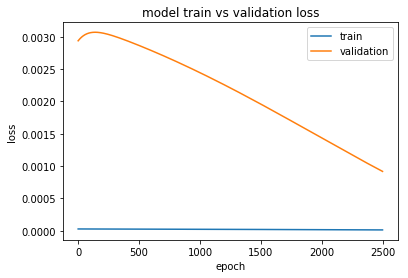

In [18]:
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# Video 8 (Slide-8)

# LSTM Model for Time Series Forecasting: Part 1

One of the most advanced models out there to forecast time series is the Long Short-Term Memory (LSTM) Neural Network.

TensorFlow LSTM that can easily be employed for time series forecasting tasks. 

The package was designed to take a lot of the headache out of implementing time series forecasts. 

It employs TensorFlow under-the-hood.

1. Easy to implement and view results with most data pre- and post-processing performed behind the scenes, including scaling, un-scaling, and evaluating confidence intervals

2. Testing the model is automatic — the model fits once on training data then again on the full time series dataset (this helps prevent overfitting and gives a fair benchmark to compare many approaches)

3. Validating and viewing loss during each training epoch on validation data, similar to TensforFlow, is possible and easy

4. Benchmarking against other modeling concepts, including Facebook Prophet and Scikit-learn models, is possible and easy

**Step-1: Import Libraries**

In [249]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

**Import Dataset and Visualize it**

So now from here can see that we have a single varible daa about the today's pollution, we will check how this is changing with respect to time. We will try to predict the value of pollution using the LSTM.

In [250]:
df = pd.read_csv('datasets/new/air_pollution.csv')
df

,date,pollution_today,dew
0,1/2/2010,145.958333,-8.500000
1,1/3/2010,78.833333,-10.125000
2,1/4/2010,31.333333,-20.875000
3,1/5/2010,42.458333,-24.583333
4,1/6/2010,56.416667,-23.708333
...,...,...,...
1820,12/27/2014,238.666667,-9.666667
1821,12/28/2014,197.375000,-10.791667
1822,12/29/2014,159.000000,-12.333333
1823,12/30/2014,46.083333,-13.916667


Now, we will change the date to datetime formate just for the plotting purposes, as we have done previous sections. This has nothing to do with our forecasting rather than ploting only.

It will give us dates into a separate series.

In [251]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df['date'])
train_dates

0      2010-01-02
1      2010-01-03
2      2010-01-04
3      2010-01-05
4      2010-01-06
          ...    
1820   2014-12-27
1821   2014-12-28
1822   2014-12-29
1823   2014-12-30
1824   2014-12-31
Name: date, Length: 1825, dtype: datetime64[ns]

Now, lets move on to the extraction of column which we will be using for the forecasting as a variable.
it will give us a list of columns from 1 to 3, column zero is our date in dataset. Note: column three will not be included in this.

In [252]:
cols = list(df)[1:3] #we are not taking last column
cols

['pollution_today', 'dew']

ok fine, now lets change datatype of values in our columns. Here, we are going to change it in float type. Because we do not want to loose any information while we perform normalization.

In [253]:
df_for_training = df[cols].astype(float)
df_for_training

,pollution_today,dew
0,145.958333,-8.500000
1,78.833333,-10.125000
2,31.333333,-20.875000
3,42.458333,-24.583333
4,56.416667,-23.708333
...,...,...
1820,238.666667,-9.666667
1821,197.375000,-10.791667
1822,159.000000,-12.333333
1823,46.083333,-13.916667


Lets visualize it using pandas plot.line command. its very simple command for basic visualization. For more advance in-depth visualization it is recommended to use matplotlib or seaborn.

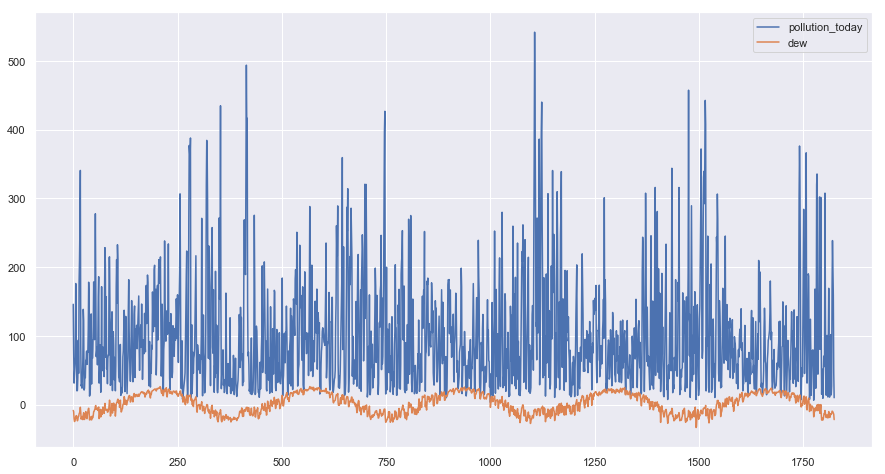

In [254]:
df_for_plot=df_for_training
df_for_plot.plot.line(figsize=(15,8))

In [255]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset


scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [256]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 25  # Number of past days we want to use to predict the future.

#Reformat input data into a shape
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (1800, 25, 2).
trainY shape == (1800, 1).


In [257]:
from tensorflow.keras.layers import Bidirectional

In [258]:
model = Sequential()

# model.add(LSTM(32, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))

# model.add(LSTM(32, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# model.add(LSTM(32, activation='relu'))


model.add(Bidirectional(LSTM(32), input_shape=(trainX.shape[1], trainX.shape[2])))


# model.add(Bidirectional(LSTM(32, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# model.add(Bidirectional(LSTM(32, activation='relu')))


model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))


model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirectio  (None, 64)               8960      
 nal)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,025
Trainable params: 9,025
Non-trainable params: 0
_________________________________________________________________


In [259]:
# fit the model
history = model.fit(trainX, trainY, epochs=62, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 99/102 [============================>.] - ETA: 0s - loss: 0.9269WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000023AA0D7E7B8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the f

102/102 [==============================] - 1s 6ms/step - loss: 0.2328 - val_loss: 0.9942
Epoch 143/500
102/102 [==============================] - 1s 6ms/step - loss: 0.2487 - val_loss: 0.9607
Epoch 144/500
102/102 [==============================] - 1s 6ms/step - loss: 0.2447 - val_loss: 0.9766
Epoch 145/500
102/102 [==============================] - 1s 7ms/step - loss: 0.2342 - val_loss: 0.9800
Epoch 146/500
102/102 [==============================] - 1s 6ms/step - loss: 0.2286 - val_loss: 1.0340
Epoch 147/500
102/102 [==============================] - 1s 7ms/step - loss: 0.2232 - val_loss: 1.0253
Epoch 148/500
102/102 [==============================] - 1s 7ms/step - loss: 0.2321 - val_loss: 0.9179
Epoch 149/500
102/102 [==============================] - 1s 6ms/step - loss: 0.2254 - val_loss: 1.0209
Epoch 150/500
102/102 [==============================] - 1s 6ms/step - loss: 0.2244 - val_loss: 1.0278
Epoch 151/500
102/102 [==============================] - 1s 6ms/step - loss: 0.2193 - v

102/102 [==============================] - 1s 10ms/step - loss: 0.1089 - val_loss: 1.0690
Epoch 301/500
102/102 [==============================] - 1s 10ms/step - loss: 0.1044 - val_loss: 1.0533
Epoch 302/500
102/102 [==============================] - 1s 9ms/step - loss: 0.0974 - val_loss: 1.0589
Epoch 303/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0942 - val_loss: 1.0106
Epoch 304/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0935 - val_loss: 0.9934
Epoch 305/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0955 - val_loss: 0.9885
Epoch 306/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0943 - val_loss: 1.0585
Epoch 307/500
102/102 [==============================] - 1s 9ms/step - loss: 0.1037 - val_loss: 1.1034
Epoch 308/500
102/102 [==============================] - 1s 10ms/step - loss: 0.1103 - val_loss: 1.0702
Epoch 309/500
102/102 [==============================] - 1s 9ms/step - loss: 0.0

Epoch 379/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0748 - val_loss: 1.1211
Epoch 380/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0849 - val_loss: 1.0628
Epoch 381/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0810 - val_loss: 1.0769
Epoch 382/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0702 - val_loss: 1.0823
Epoch 383/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0720 - val_loss: 1.0494
Epoch 384/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0727 - val_loss: 1.0856
Epoch 385/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0653 - val_loss: 1.0827
Epoch 386/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0718 - val_loss: 1.0603
Epoch 387/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0694 - val_loss: 1.0990
Epoch 388/500
102/102 [==============================] - 1s 10ms

Epoch 458/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0520 - val_loss: 1.0650
Epoch 459/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0579 - val_loss: 1.0374
Epoch 460/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0628 - val_loss: 1.0663
Epoch 461/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0585 - val_loss: 1.0679
Epoch 462/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0570 - val_loss: 1.0561
Epoch 463/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0582 - val_loss: 1.0942
Epoch 464/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0578 - val_loss: 1.1270
Epoch 465/500
102/102 [==============================] - 1s 10ms/step - loss: 0.0753 - val_loss: 1.0442
Epoch 466/500
102/102 [==============================] - 1s 9ms/step - loss: 0.0706 - val_loss: 1.0063
Epoch 467/500
102/102 [==============================] - 1s 10ms/

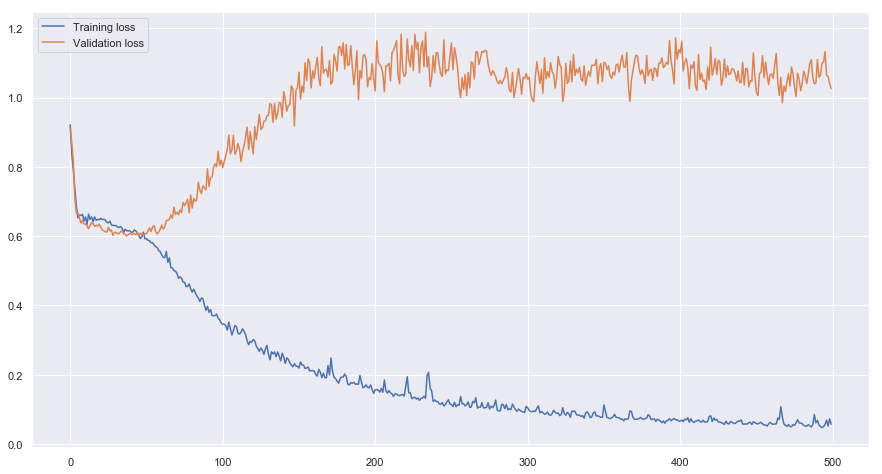

In [260]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Video 9

# LSTM Model for Time Series Forecasting: Part 2

In [261]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

Here we are going to forecast the next 100 values.

In [262]:
n_past = 10
n_days_for_prediction=100  

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()


In [263]:
# make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [264]:
#Perform inverse transformation to rescale back to original range
#Since we used 1 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [265]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'pollution_today':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])

C:\Users\lenovo\anaconda3\envs\grl\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lenovo\anaconda3\envs\grl\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\lenovo\anaconda3\envs\grl\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error

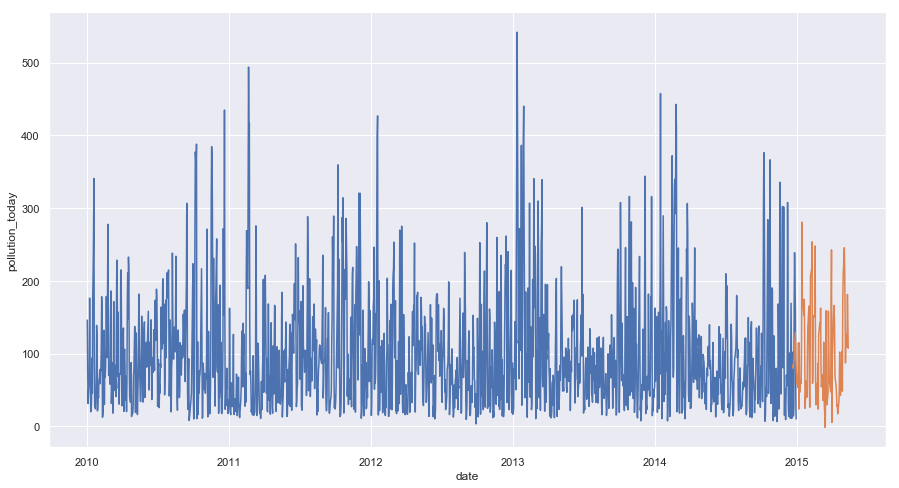

In [266]:
original = df[['date', 'pollution_today']]
original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2010-1-1']

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(original['date'], original['pollution_today'])
sns.lineplot(df_forecast['date'], df_forecast['pollution_today'])